# Detecția spike-urilor zilnice ale prezentărilor la urgență în România (2010): analiză spațio-temporală pe profiluri ICD de comorbiditate

1. Pre-procesare și standardizare

a. Curățare

b. Transformări

c. Construirea seriilor temporale

    > Nivel A (global): total cazuri/zi

    > Nivel B (județ spital): cazuri/zi/județ

    > Nivel C (judet spital x localitate): cazuri/zi/localitate/judet

    > Nivel C (județ spital × diagnostic principal): cazuri/zi/județ/diagnostic

    > Nivel D (subgrupuri): adaug vârstă/sex/multimorbiditate


In [41]:
#importam bibliotecile necesare

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt



In [42]:
caleDateRaw = r"..\data\raw"
caleDateInterim = r"..\data\interim"
dateUrgenta = caleDateRaw + r"\Urgente_comorbiditati"

In [44]:
# verific calea catre date
base_path = Path().resolve()
print(base_path)


F:\Tudor_Work\notebooks


In [45]:
# incarc un fiser excel cu datele despre nonurgentele medicale si comorbiditati din 2010
df = pd.read_csv(
    dateUrgenta + r"\2010_nonurgenta.csv",
    sep="#",
    encoding="utf-8-sig"
)


# afisez primele 5 linii din dataframe
print(df.head())

  JudetSpital LocalitateSpital JudetPacient LocalitatePacient  Virsta Sex  \
0        ALBA       ALBA IULIA         ALBA  GARDA-BARBULESTI      73   F   
1        ALBA       ALBA IULIA         ALBA    GEOAGIU DE SUS       0   M   
2        ALBA       ALBA IULIA         ALBA             SEBES       0   M   
3        ALBA       ALBA IULIA         ALBA             SEBES       0   M   
4        ALBA       ALBA IULIA         ALBA             SEBES       0   M   

  DataInternare     Criteriu DiagnosticInternare DiagnosticPrincipal  \
0     2010/6/29  non-urgenta               I63.8               I63.8   
1     2010/8/27  non-urgenta               P05.9               P03.4   
2     2010/6/22  non-urgenta               P20.9              P07.13   
3     2010/7/30  non-urgenta               Z38.0               Z38.0   
4      2010/8/2  non-urgenta              P07.32              P07.32   

   NrCazuri                                      Comorbiditati  
0         1  I67.2-1,G83.1-1,I10-1,M47.

In [46]:
print(df.columns)

Index(['JudetSpital', 'LocalitateSpital', 'JudetPacient', 'LocalitatePacient',
       'Virsta', 'Sex', 'DataInternare', 'Criteriu', 'DiagnosticInternare',
       'DiagnosticPrincipal', 'NrCazuri', 'Comorbiditati'],
      dtype='str')


In [47]:
df.isna().any().any()
df.isna().sum()


JudetSpital                 0
LocalitateSpital            0
JudetPacient                0
LocalitatePacient           0
Virsta                      0
Sex                         0
DataInternare               0
Criteriu                    0
DiagnosticInternare         0
DiagnosticPrincipal         0
NrCazuri                    0
Comorbiditati          318718
dtype: int64

In [ ]:
print(len(df) )

2415420


In [ ]:
print(df['Comorbiditati'])

0          I67.2-1,G83.1-1,I10-1,M47.80-1,E11.9-1,G46.4*-...
1          Q53.2-1,P02.5-1,Z39.00-1,P00.0-1,P83.3-1,P22.1...
2          Z00.0-1,Z23.2-1,P83.3-1,P28.40-1,Z39.00-1,P28.5-1
3                                   Z39.00-1,Z00.0-1,Z23.2-1
4                           Z39.00-1,P59.9-1,Z00.0-1,Z23.2-1
                                 ...                        
2415415                              I50.1-1,I25.9-1,I20.9-1
2415416                     Z90.4-1,Z90.7-1,Z51.1-1,L99.8*-1
2415417                                     I70.20-1,I25.9-1
2415418                                     Z39.00-1,Z00.0-1
2415419                                                  NaN
Name: Comorbiditati, Length: 2415420, dtype: str


In [ ]:
df_agregat = (
    df
    .groupby(['JudetSpital', 'LocalitateSpital', 'DataInternare'], as_index=False)
    .agg({'NrCazuri': 'sum'})
)

df_agregat.head()


,JudetSpital,LocalitateSpital,DataInternare,NrCazuri
0,ALBA,ABRUD,2009/12/14,2
1,ALBA,ABRUD,2009/12/18,1
2,ALBA,ABRUD,2010/1/11,2
3,ALBA,ABRUD,2010/1/12,3
4,ALBA,ABRUD,2010/1/13,3


In [ ]:
df_agregat['LocalitateSpital'].unique()

<StringArray>
[         'ABRUD',           'AIUD',     'ALBA IULIA',  'BAIA DE ARIES',
           'BLAJ',        'CAMPENI',          'CUGIR',     'OCNA MURES',
          'SEBES',         'ZLATNA',
 ...
         'HOREZU',       'MIHAESTI', 'RAMNICU VALCEA',          'ADJUD',
     'DUMBRAVENI',        'FOCSANI',      'MARASESTI',       'ODOBESTI',
         'PANCIU',          'VIDRA']
Length: 300, dtype: str

In [ ]:
df_abrud = df_agregat[df_agregat['LocalitateSpital'] == 'ABRUD'].copy()


In [ ]:
print(len(df_abrud))

216


In [ ]:
df_abrud['DataInternare'] = pd.to_datetime(df_abrud['DataInternare'])


In [ ]:
df_abrud = df_abrud.sort_values('DataInternare')


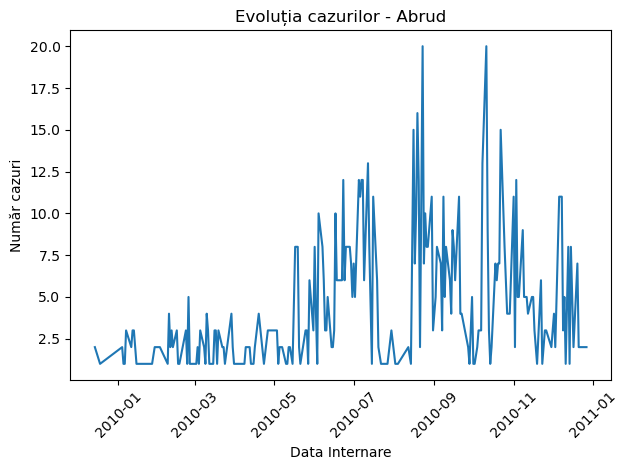

In [ ]:


plt.figure()
plt.plot(df_abrud['DataInternare'], df_abrud['NrCazuri'])
plt.xlabel("Data Internare")
plt.ylabel("Număr cazuri")
plt.title("Evoluția cazurilor - Abrud")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
